In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy as sp
from scipy import stats
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

# Topics

* Pearson correlation
* p(rho)
* Linear regression
* Visualised liner relationshop by seaborn
* R-squared
* AIC
* The over all F test
* The indivisual T test

# Independent variable and Dependent variable

* Independent variable = predictor = explanatory = X 
* Dependent variable = outcome = response = y


In [5]:
red = pd.read_csv("data/winequality-red.csv",sep=";")
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wh = pd.read_csv("data/winequality-white.csv",sep=";")
wh

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# What is Pearson correlation? 

*  A number between -1 and +1
*  It indicates extent 2 variables(independent variable and dependent variable) are linearly related
*  Suitable for quantitative variables 
    * For ordinal variables, use the Spearman correlation or Kendall’s tau and
    * For nominal variables, use Cramér’s V.

# How to show Pearson correlation 

In [7]:
# Pearson correlation (default) for all predictor variables

corr_red = red.corr(method='pearson')
corr_red.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# How to output Pearson correlation and P-value


In [8]:
# Pearson correlation and P-value for one predctor variable

pearson,pvalue= sp.stats.pearsonr(red["quality"], red["alcohol"])
pearson,pvalue

(0.47616632400113607, 2.831476974778582e-91)

#### Output of p-value from scipy.stats

* 2e-4 as an example
* "2e-4" = 2 × 10-4. = 0.0002. Therefore, 2e-4 number on calculator means or 2e-4 in decimal form is: 0.0002.

In [9]:
1e5

100000.0

In [12]:
2e-3

0.002

In [13]:
2e-2

0.02

In [7]:
wh.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [8]:
# correlation kendall

red.corr(method='kendall').style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.185197,0.484271,0.155029,0.176043,-0.119301,-0.056879,0.457461,-0.527832,0.141343,-0.048870,0.087966
volatile acidity,-0.185197,1.000000,-0.428354,0.022407,0.109608,0.012573,0.063701,0.015913,0.158746,-0.228888,-0.151839,-0.300779
citric acid,0.484271,-0.428354,1.000000,0.123007,0.076729,-0.049804,0.011645,0.245729,-0.389752,0.226669,0.064004,0.167318
residual sugar,0.155029,0.022407,0.123007,1.000000,0.152415,0.052682,0.102265,0.295986,-0.063127,0.026959,0.081206,0.025744
chlorides,0.176043,0.109608,0.076729,0.152415,1.000000,0.000439,0.091610,0.287866,-0.162706,0.014227,-0.197176,-0.148919
free sulfur dioxide,-0.119301,0.012573,-0.049804,0.052682,0.000439,1.000000,0.606908,-0.028972,0.079300,0.031706,-0.056019,-0.045646
total sulfur dioxide,-0.056879,0.063701,0.011645,0.102265,0.091610,0.606908,1.000000,0.087719,-0.006798,-0.000194,-0.179212,-0.156612
density,0.457461,0.015913,0.245729,0.295986,0.287866,-0.028972,0.087719,1.000000,-0.217228,0.110191,-0.329754,-0.136611
pH,-0.527832,0.158746,-0.389752,-0.063127,-0.162706,0.079300,-0.006798,-0.217228,1.000000,-0.053568,0.125311,-0.034235
sulphates,0.141343,-0.228888,0.226669,0.026959,0.014227,0.031706,-0.000194,0.110191,-0.053568,1.000000,0.143745,0.299270


In [9]:
# correlation spearman

red.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


# Visualised liner relationshop by seaborn

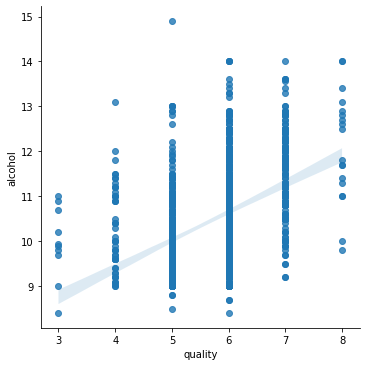

In [7]:
# alcohol, positive correlation

sns.lmplot(data=red,x="quality",y="alcohol")

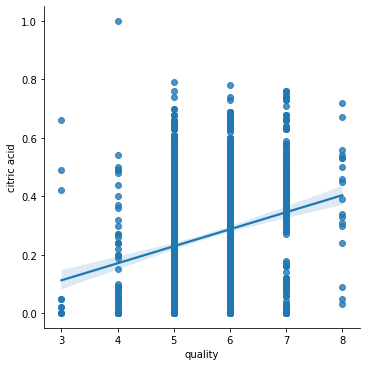

In [20]:
# citric acid, positive correlation

sns.lmplot(data=red,x="quality",y="citric acid",robust=True)

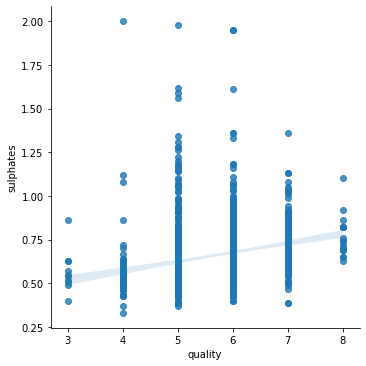

In [8]:
# sulphates, positive correlation

sns.lmplot(data=red,x="quality",y="sulphates")

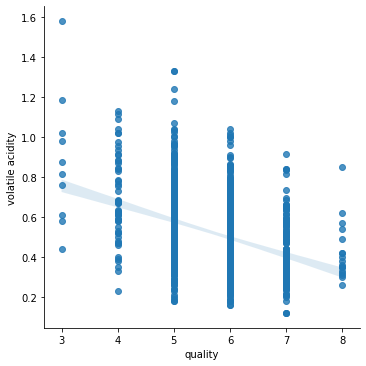

In [13]:
# volatile acidity, negative correlation

sns.lmplot(data=red,x="quality",y="volatile acidity")

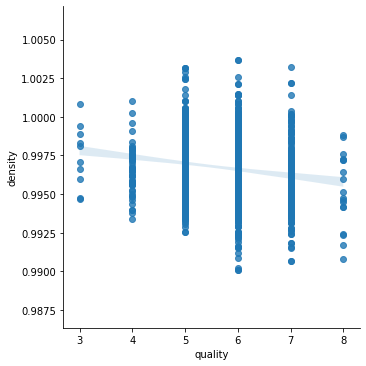

In [21]:
# density, Negative correlation

sns.lmplot(data=red,x="quality",y="density")

# Red data : Independent = alcohol, dependent = quality

In [58]:
# simple liner relationshop
# (formula = "dependent variable ~ independent variable")

lm_model=smf.ols(formula="quality~alcohol",data=red).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           2.83e-91
Time:                        21:18:41   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Summary

* intercept = 1.87
* slope coefficient = 0.36
* 95% CI (one tailed-right) = 0.394
* 95% CI (one tailed-left) = 0.328
* p-value is too small so it shows ZERO. = Very strong 
* t-statistic = 21.639
* r-squared = 0.227

# AIC
* null_model.aic 3855 > lm_model 3446 = **it wil be better to include "alcohol" variable to predect "quality". because AIC for lm_model is lower.** The lower AIC The better.

In [59]:
null_model= smf.ols("quality~1",data=red).fit()
null_model.aic

3855.268619701148

In [60]:
lm_model.aic

3446.1135094800384

# Regression analysis
### yi = beta0 + beta1 * xi
* yi (dependent variable = "quality") = beta0(intercept) + beta1(slope coefficient) * (independent variable = "alcohol")

In [61]:
lm_model.params

Intercept    1.874975
alcohol      0.360842
dtype: float64

In [62]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
print(beta0, beta1)

1.8749748869971647 0.36084176533503515


In [63]:
# When alcohol is 13, what will be "quality"?
alcohol=13
y = beta0+beta1*alcohol
print(y)

6.565917836352622


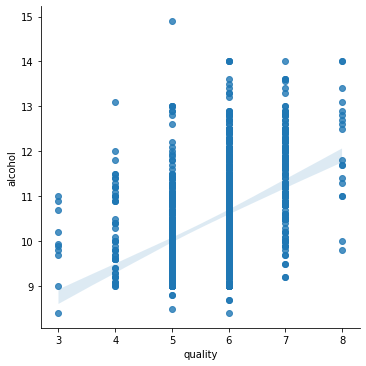

In [64]:
# Check the result! when alcohol is 13, quality is around 6.5. 

sns.lmplot(data=red,x="quality",y="alcohol")

# Hypothesis testing 

* p(rho) : correlation in between variables in the **population.**
* r      : correlation in between variables in the **sample(N).**
* correlation value : between **-1 and 0** , or between **1 and 0.**
* Ho is there is no correlation. **"p(rho)= 0", means no correlation.**
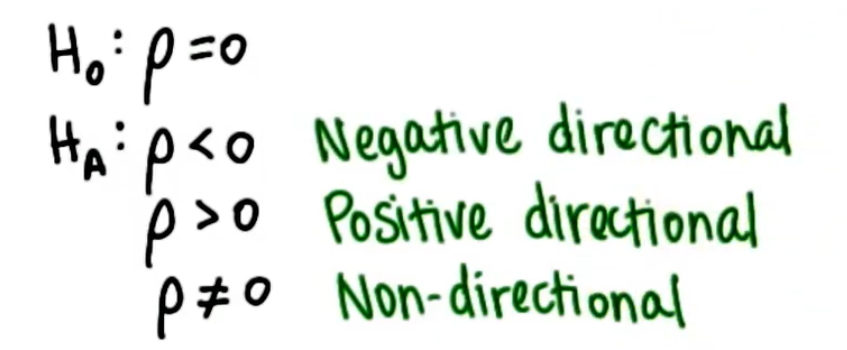

# T-statisic and Degrees of Freedom

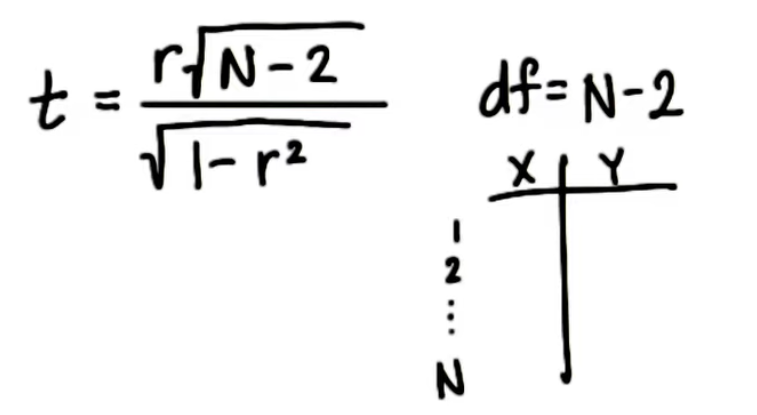

In [47]:
# Select random 150 samples

red_sample = red.sample(n=150)
red_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1560,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1023,8.2,0.320,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.3,6
740,8.3,0.760,0.29,4.2,0.075,12.0,16.0,0.99650,3.45,0.68,11.5,6
895,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
162,7.8,0.530,0.04,1.7,0.076,17.0,31.0,0.99640,3.33,0.56,10.0,6
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
1420,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5
1014,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6


In [79]:
red_sample.to_csv("data/red_sample",index=False)

In [4]:
red_sample = pd.read_csv("data/red_sample")
red_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1,8.2,0.320,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.3,6
2,8.3,0.760,0.29,4.2,0.075,12.0,16.0,0.99650,3.45,0.68,11.5,6
3,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
4,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
145,7.8,0.530,0.04,1.7,0.076,17.0,31.0,0.99640,3.33,0.56,10.0,6
146,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
147,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5
148,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6


In [90]:
# sample size
N=150

# degrees of freesom
dof=N-2

# t-critical 
# alpha 0.05 non directional = alpha 0.025

t_critical =1.976

* t-critical https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
* t-critical calculator https://www.socscistatistics.com/tests/criticalvalues/default.aspx

In [91]:
# slope, intercept, r_value, p_value, standard_error

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(red_sample["alcohol"],red_sample["quality"])
slope, intercept, r_value, p_value, std_err

(0.3193930595232522,
 2.222291949608952,
 0.4333371572945474,
 3.0431325933972545e-08,
 0.054601583092543225)

In [92]:
# r-squared

r_squared = r_value**2
r_squared

0.18778109189211933

# What is R-squared? 

* A number between 0 and 1
* **Quantifies the variance explained in a statistical model**. Technically, R-Squared is only **valid for linear models with numeric** data.
* It is called in many different ways;  r-squared, R-square, the coefficient of determination, variance explained, the squared correlation, r2, and R2.

# How to interpret R-squared

* Technically, R-Squared is only **valid for linear models with numeric** data. 
* This makes it **dangerous to conclude that a model is good or bad based solely on the value of R-Squared**. Example below;
    * When your predictor or outcome variables are categorical (e.g., rating scales) or counts, the R-Squared will typically be lower than with truly numeric data.
    * The more true noise in the data, the lower the R-Squared. For example, if building models based on stated preferences of people, there is a lot of noise so a high R-Squared is hard to achieve. By contrast, models of astronomical phenomena are the other way around.
    * When you have more observations, the R-Squared gets lower.
    * When you have more predictor variables, the R-Squared gets higher (this is offset by the previous point; the lower the ratio of observations to predictor variables, the higher the R-Squared).
    * If your data is not a simple random sample the R-Squared can be inflated. For example, consider models based on time series data or geographic data. These are rarely simple random samples, and tend to get much higher R-Squared statistics.
    * When your model excludes variables that are obviously important, the R-Squared will necessarily be small. For example, if you have a model looking at how brand imagery drives brand preference, and your model ignores practical things like price, distribution, flavor, and quality, the R-Squared is inevitably going to be small even if your model is great.
    * Models based on aggregated data (e.g., state-level data) have much higher R-Squared statistics than those based on case-level data.
*  R-Squared of more than **0.9**. Such high values always mean that something is **wrong**

# More about R-squared...

* 2 ways to use r-squared to interpret its value.
    * **To understand the relationships between the independent variables and dependent variable.**
    or,
    * **To predict the dependent variable.**

* Predictions are more complex than just the single predicted value. Predictions include a margin of error. **More precise predictions have a smaller amount of error.**

* R2 is relevant in this context because it is a measure of the error. Lower R2 values correspond to models with more error, which in turn produces predictions that are less precise. In other words, **if your R2 is too low, your predictions will be too imprecise to be useful.**

* However, R2 doesn’t tell you directly whether the predictions are sufficiently precise for your requirements. We need a direct measure of precision that uses the units of the dependent variable. That’s why asking, “How high does R-squared need to be?” still is not the correct question.

* A prediction interval is a range where a single new observation is likely to fall given values of the independent variable(s) that you specify. These ranges incorporate the margin of error around the predicted value. **If the prediction intervals are too wide, the predictions don’t provide useful information.** Narrow prediction intervals represent more precise predictions.
* to determine whether the prediction **intervals are narrow enough to represent meaningful predictions**. **By assessing the prediction intervals, you are evaluating the precision of the model** directly rather than relying on an arbitrary cut-off value for R-squared.

* R-squared does have some good uses. For one thing, compare your R2 value to values from similar studies. If your R2 is markedly higher or lower, you should investigate because there might be a problem.

In [93]:
# t-statistic

t_stats = r_value*math.sqrt(N-2)/math.sqrt(1-r_squared)
t_stats

5.849520131713375

In [94]:
# Pearson correlation

pearson,pvalue= sp.stats.pearsonr(red_sample["quality"], red_sample["alcohol"])
pearson,pvalue

(0.4333371572945468, 3.043132593397414e-08)

In [95]:
# above many processes will be returned in one code

lm_model=smf.ols(formula="quality~alcohol",data=red_sample).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     34.22
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           3.04e-08
Time:                        21:59:31   Log-Likelihood:                -147.55
No. Observations:                 150   AIC:                             299.1
Df Residuals:                     148   BIC:                             305.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2223      0.569      3.909      0.000       1.099       3.346
alcohol        0.3194      0.055      5.850      0.000       0.211       0.427
==============================================================================
Omnibus:                       11.453   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               22.991
Skew:                           0.272   Prob(JB):                     1.02e-05
Kurtosis:                       4.839   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

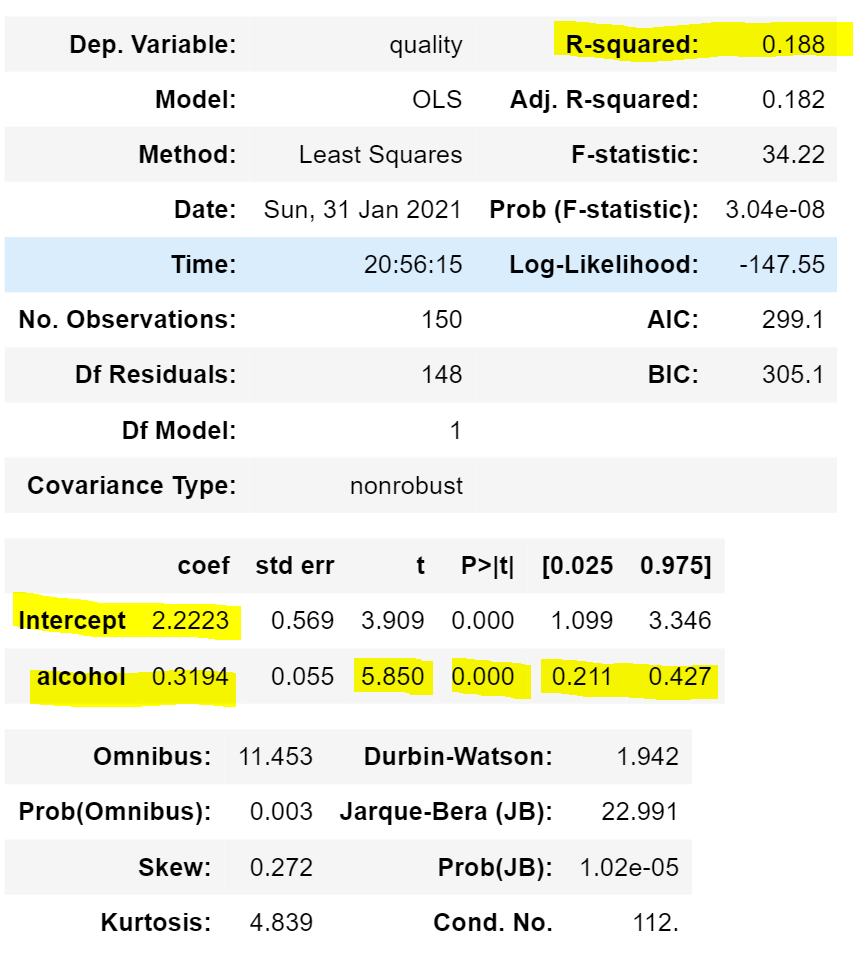

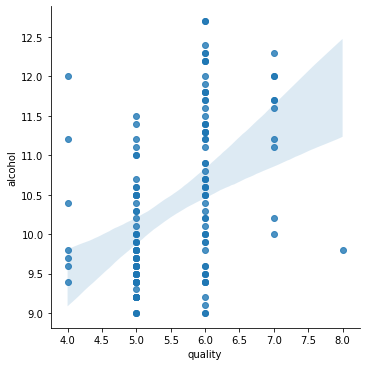

In [96]:
sns.lmplot(data=red_sample,x="quality",y="alcohol")

# Hypothesis testing result

* Ho: p(rho) = 0
* Ha: p(rho) != 0, p(rho)>0, p(rho)<0
* Sample size = 150
* Non directional, alpha = 0.05
* t_critical 1.976 < t_stats 5.84 = **Reject Ho.**
*  As Ho is rejected, there is a significant relationshop between alcohol and quality.
*  95% CI (0.211, 0.427). This also indicate rejecting Ho. (range(0.211 and 0.427) does not have 0.)

# Summary
* According to hypothesis testing, there is a significant relationshop between alcohol and quality.
* As **p-value(0.000)** shows, the value will be less than 0.000, this difference is **considered to be extremely statistically significant.**
* R-squared is 0.18. Generally this rate is considered as "very low affect".
* **Pearson correlation is 0.43.**

# Multiple regresion : independent variable = alcohol, sulphates

* Y = Dependent variabl
* Beta0 = Intercept 
* Beta1 = Slope(coefficient) for x (independent variable)
* X = Independent variable

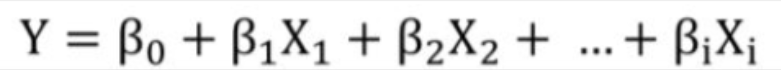

# R = multiple correlation coefficient

* R tells the strengh of the relationshop between y and combined set of predictor variables(x).

In [60]:
# Set 2 independent variables

X = red_sample[["alcohol","sulphates"]]
y = red_sample["quality"]

In [98]:
# liner model from sklearn

clf_reg = LinearRegression()
clf_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# Intercept and coefficients

print('Intercept:', clf_reg.intercept_)
print('Coefficients (slope):', clf_reg.coef_)

Intercept: 1.9501245300135972
Coefficients (slope): [0.31603342 0.47493145]


In [100]:
# prediction with sklearn

alcohol_rate = 7.5
sulphates_rate = 0.55
print ('Predicted quality:', clf_reg.predict([[alcohol_rate, sulphates_rate]]))

Predicted quality: [4.58158747]


In [101]:
X

,alcohol,sulphates
0,9.9,0.52
1,12.3,0.55
2,11.5,0.68
3,10.7,0.58
4,10.6,0.67
...,...,...
145,10.0,0.56
146,9.4,0.52
147,9.8,0.46
148,11.2,0.58


In [102]:
pred = clf_reg.predict(X)
print(pred)

[5.32581974 6.09854789 5.90746224 5.60714236 5.61828285 6.14621729
 5.70816729 5.57864647 5.45715868 5.29750011 5.2595056  5.30371502
 5.83475693 6.14621729 5.91842646 5.7573023  5.33549463 5.17108675
 5.43651956 5.41916417 5.55818362 5.82889454 6.17271879 5.31649737
 5.23265157 5.21529617 5.41951669 5.52183096 5.93103255 5.5201891
 5.36217239 5.2595056  5.18351657 5.10459634 5.38937895 5.21365431
 5.45698242 5.77155024 5.29585825 5.11409497 5.62942334 5.35595748
 6.10200787 5.40345063 5.3607068  6.04976541 5.83164947 6.11297209
 5.62613962 5.16469557 5.33385277 5.85686164 5.82050898 6.04665795
 6.10018975 5.77137398 5.35742308 5.28964334 5.10313075 5.56604039
 5.87896635 5.45076751 5.14880577 5.25329069 5.31157179 5.47287222
 5.1915496  5.81411781 5.36709797 5.17730166 5.50758302 5.276861
 5.4113074  5.48237085 6.21071331 5.60110371 5.7746577  5.84132436
 5.18990774 5.93449253 6.00848717 5.06185251 5.1235936  5.06988555
 5.55689429 5.08413349 5.49022762 5.59617813 5.511043   6.0906911

In [103]:
# This is the R² score of the model.

clf_reg.score(X,y)

0.2031736069940573

In [104]:
print("slope/coefficient", clf_reg.coef_)
print("intercept",clf_reg.intercept_)

slope/coefficient [0.31603342 0.47493145]
intercept 1.9501245300135972


In [61]:
# Liner regression statsmodels
# Without y-intercept 

model = sm.OLS(y, X).fit()
pred = model.predict(X)
sm_model = model.summary()
print(sm_model)

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              5143.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                   1.71e-137
Time:                        15:21:47   Log-Likelihood:                         -151.54
No. Observations:                 150   AIC:                                      307.1
Df Residuals:                     148   BIC:                                      313.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
# adding a constant (y-intercept)

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
pred = model.predict(X)
sm_model = model.summary()
print(sm_model)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     18.74
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           5.63e-08
Time:                        15:22:47   Log-Likelihood:                -146.12
No. Observations:                 150   AIC:                             298.2
Df Residuals:                     147   BIC:                             307.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9501      0.588      3.318      0.0

# Summary

* R-squared rate is improved by 0.015 compared to one predictor variable. 2 inddependent variables made improvement. 
* P-value of sulphates variable is 0.094. Not as strong as alcohol p-value.
* t_critical 1.976 < t_stats of sulphates(1.685). It is considered as not quite statistically significant.
* AIC is less by 1 comapred to simple liner regression. 

# HOW DO I DO multiple liner regression HYPOTHESIS ?

1. t-test indivisual independent variable (beta1 = alcohol and beta2 = sulphates). in this case, there are two independent variable, so conduct t-test twice. relation between alcohol and quality, relation bewteen sulphates and quality
2. overall significant (F-test).  
3. if 1 and 2 tests are conducted "reject Ho", then conclude "reject Ho."


# Hypothesis testing result

* Ho: p(rho) = 0
* Ha: p(rho) != 0, p(rho)>0, p(rho)<0
* Sample size = 150
* Non directional, alpha = 0.05
* indivisual t-test and overall f-test = not significant = **Failed to reject Ho**
*  As Ho was failed to reject, there is a only significant relationshop between alcohol and quality.


# Over alll F test
if you have beta-k variables and want to know if the model is useful.>> Test to see if the slope(coeeficient) is ZERO.

* Ho: Beta1 and Beta2 are ZERO. (Means that none of independent variables have a significant relationship with dependent variable.)
* Ha: At least one of slope(coeffifient) is NOT ZERO. (means that at least one independent varible has a significant relationship with dependent variable.)


# note
* k = # of independent variables
* n = sample size

In [8]:
model = ols("quality~alcohol",data=red_sample).fit()
anova = sm.stats.anova_lm(model,type=2)
print(anova)

             df     sum_sq    mean_sq          F        PR(>F)
alcohol     1.0  14.521738  14.521738  34.216886  3.043133e-08
Residual  148.0  62.811596   0.424403        NaN           NaN
